In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:00<00:00, 141MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s]


In [5]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [83]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Load and Prepare The Data

In [7]:
# take the path of the file
data_csv_file = '/content/creditcard.csv'
# read the data from the csv file and convert it into a dataframe
data = pd.read_csv(data_csv_file)

In [8]:
# display the first 5 rows from the dataframe
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
# check if there any dulicated rows
data.duplicated().sum()

1081

# Exploratory Data Analysis

In [38]:
# print the number of rows and columns in the dataframe
print('The data contains %d rows and %d columns (attributes)' %(data.shape[0], data.shape[1]))

The data contains 284807 rows and 31 columns (attributes)


In [40]:
# print information about the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
# print the data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
# print column names
col_names = data.columns
print(col_names)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [54]:
# print the number of the fraud and valid transactions
classes, counts = np.unique(data["Class"], return_counts=True)
print(f'Fraud Cases: {counts[0]}')
print(f'Valid Transactions: {counts[1]}')

Fraud Cases: 284315
Valid Transactions: 492


# Charts

([<matplotlib.patches.Wedge at 0x7dadde9c95a0>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'valid: 284315'),
  Text(1.0999838018177286, -0.005969567707642625, 'fraud: 492')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.8%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.2%')])

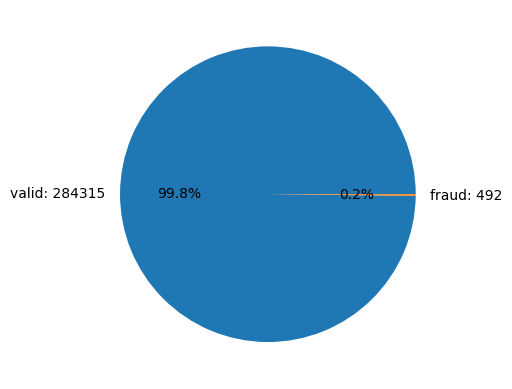

In [55]:
# plot a pie chart
Labels = 'valid: '+ str(counts[0]), 'fraud: '+ str(counts[1])
fig, ax = plt.subplots()
ax.pie(counts, labels=Labels, autopct='%1.1f%%')

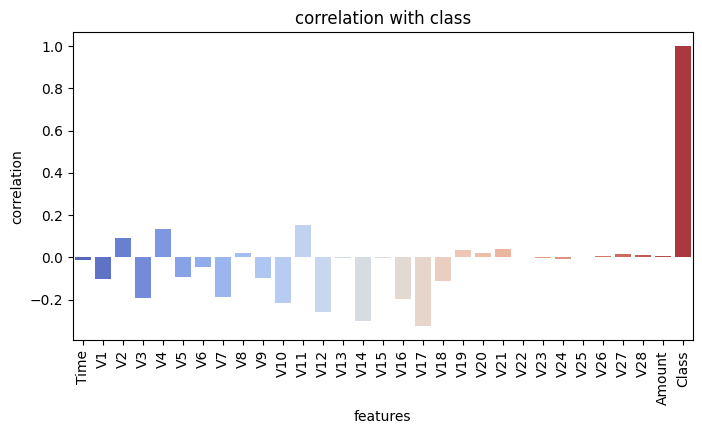

In [57]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('correlation with class')
plt.xlabel('features')
plt.ylabel('correlation')
plt.show()

# Data Preprocessing

In [59]:
# extract the features from the data frame
columns = data.columns
features_names = columns[columns != 'Class']
features = data[features_names]
target = data['Class']

In [60]:
# print the shape of the features and target
print('the shape of the featuers: ', features.shape )
print('the shape of the target  : ', target.shape )

the shape of the featuers:  (284807, 30)
the shape of the target  :  (284807,)


In [62]:
# split the data and handel the imbalance data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=50, stratify=target)

In [63]:
# print the percentage of the valid transactions in the training set
Y_train.sum()/Y_train.count()

0.001729245759178389

In [64]:
# print the percentage of the valid transactions in the training set
Y_test.sum()/Y_test.count()

0.0017204452090867595

In [66]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Model (Logistic Regression)

In [67]:
# initialize the Logistic Regression model
model = LogisticRegression(random_state=50)

In [68]:
# fit (train) the model
model.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=50)

In [69]:
# get the prediction of the trained model
predictions = model.predict(X_test_scaled)

# Evaluate the Model (Logistic Regression)

In [70]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

Confusion Matrix:
[[56859     5]
 [   38    60]]


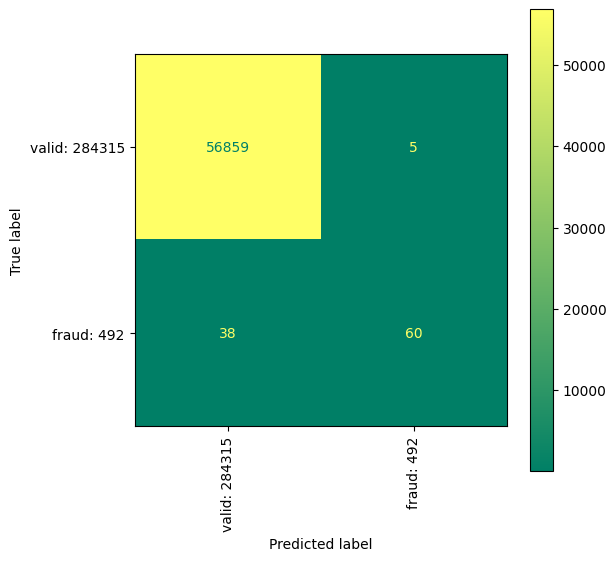

In [74]:
# find the confusion matrix
cm = confusion_matrix(Y_test, predictions)
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [75]:
print('                      classification_report                      ')
print(classification_report(Y_test, predictions))

                      classification_report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.61      0.74        98

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [78]:
# Calculate the metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)

In [82]:
# convert the scores into a dataframe and print it
Report=pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Create a DataFrame
Report=Report._append({'Model':'Logistic Regression','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':f1_score}, ignore_index=True)
Report

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.999245,0.923077,0.612245,0.736196


# Build the Model (Random Forest)

In [85]:
# initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

In [86]:
# fit (train) the model
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [87]:
# get the prediction of the trained model
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the Model (Random Forest)

In [88]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_predictions))

Confusion Matrix:
[[56858     6]
 [   14    84]]


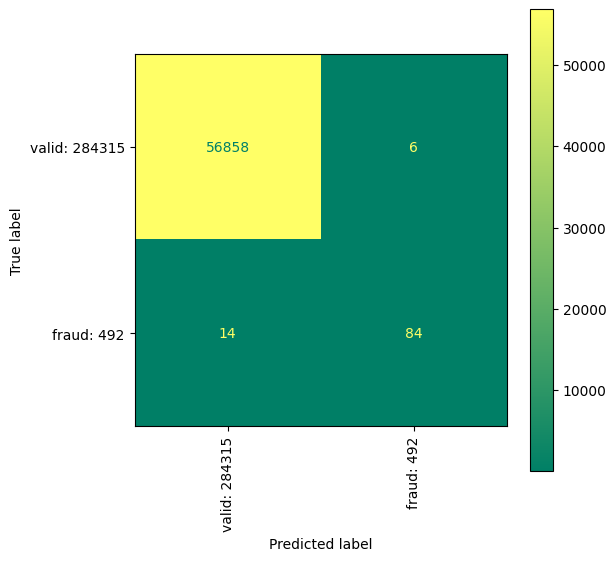

In [89]:
# find the confusion matrix
cm2 = confusion_matrix(Y_test, rf_predictions)
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=Labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [90]:
print('                      classification_report                      ')
print(classification_report(Y_test, rf_predictions))

                      classification_report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [91]:
# Calculate the metrics
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_precision = precision_score(Y_test, rf_predictions)
rf_recall = recall_score(Y_test, rf_predictions)
rf_f1_score = f1_score(Y_test, rf_predictions)

In [92]:
Report=Report._append({'Model':'Random Forest','Accuracy':rf_accuracy, 'Precision':rf_precision, 'Recall':rf_recall, 'F1-Score':rf_f1_score}, ignore_index=True)
Report

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.999245,0.923077,0.612245,0.736196
1,Random Forest,0.999649,0.933333,0.857143,0.893617
